# Graph Theory: Simple and Shortest Paths - Lab

## Introduction

In this lab you'll take the concepts from the previous lesson and code them from scratch yourself! You'll start by unpacking Dijkstra's algorithm and write an implementation to find the shortest path between two nodes. From there, you'll expand on the initial function in order to return the path itself and create a visualization to better understand the underlying process.

## Objectives

In this lab you will: 

- Code Dijkstra's algorithm from scratch 
- Calculate simple paths and shortest paths for undirected, directed and weighted graphs 
- Visualize network graphs with networkx 


## Importing Packages

In [2]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
%matplotlib inline

## Regenerating the [Small World] Network

To get started, here's the network from the previous lesson:

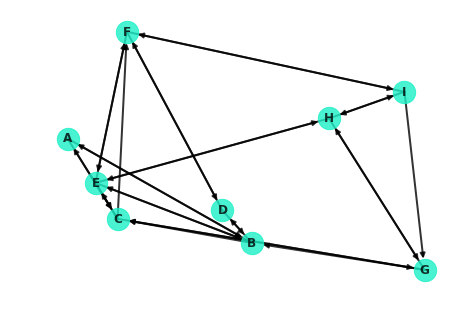

In [3]:
G = nx.navigable_small_world_graph(3, seed=3)
G = nx.relabel_nodes(G, dict(zip(G.nodes, ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I'])))
nx.draw(G, pos=nx.random_layout(G, seed=9), with_labels=True, node_color='#1cf0c7',
        node_size=500, font_weight='bold', width=2, alpha=0.8)

## Dijkstra's Algorithm

As a helpful reference, here's the description of Dijkstra's Algorithm from the previous lesson:


Dijkstra's algorithm is essentially a depth based search. It commences at the starting node, spanning out to neighboring nodes and in turn visiting their neighbors in search of the destination. More formally, here's a general pseudocode outline for the algorithm:

1. Mark all nodes as unvisited
2. Set the distance of the starting node as 0, and $\infty$ for all other nodes
3. Set the starting node as the current node
4. Visit each of the neighbors of the current node
    1. For each neighbor, calculate the distance to that node traveling through the current node
    2. If this distance is less then the current distance recorded for that node, update the record accordingly
5. Mark the current node as "visited"
6. Of the unvisited nodes, set the one with the smallest distance to the current node
7. Repeat steps 4 through 6 until one of the following:
    1. The algorithm terminates when the destination node is the current node
    2. Alternatively, if the smallest distance of the unvisited nodes is $\infty$, then no path exists to the destination node. 

> Note: Dijkstra's algorithm (and NetworkX's implementations demonstrated above) returns a single path. In many cases, there may be multiple paths which are tied for the shortest distance between two nodes. In such cases, it is arbitrary which path is returned. 


## Coding Dijkstra's Algorithm (Part 1)

Implement a function to perform Dijkstra's algorithm. The function should take in three parameters: the graph `G`, the starting node `u`, and the destination node `v`. From there, return the minimum distance between nodes `u` and `v`. In the case that there is no path connecting `u` and `v`, printout an appropriate notification and return a missing value (`np.nan`). 

In [5]:
def dijkstra(G, u, v):
    """
    G is the graph in question
    u is the starting node
    v is the destination node
    
    Future: Add weighting Option
    """
    visited = set()
    unvisited = set(G.nodes)
    distances = {u:0}  # Dict
    for node in unvisited:
        if node == u:   # starting node
            continue
        else:
            distances[node] = np.inf   # Infinity
    cur_node =  u
    weight = 1 # Set default wt. for non-weighted graphs
    while len(unvisited) > 0:
        if cur_node == v:
            break
        if min([distances[node] for node in unvisited]) == np.inf:
            print('There is NO path between u and v.')
            return np.nan
        # Pull up neighbors
        neighbors = G[cur_node]
        for node in neighbors:
            # Future update: Add wt. update for weighted graphs
            # Set either the distance thru the current node or a previous shorter path
            distances[node] = min(distances[cur_node] + weight, distances[node])
        # Mark current node as visited
        visited.add(cur_node)
        unvisited.remove(cur_node)
        cur_node = sorted([(node, distances[node]) for node in unvisited], key=lambda x:x[1]) [0][0] # set node to min dist as the current node
    return distances[v]

Test out your function on a couple of node pairs, and compare the output to that of NetworkX's built in implementation to verify your results.

In [6]:
# Test your function here
dijkstra(G, 'F', 'G')

2

In [12]:
# Test your function here
dijkstra(G, 'E', 'C')

1

In [7]:
# Compare to NetworkX's built in method
nx.dijkstra_path_length(G, 'F', 'G')

2

In [11]:
# Compare to NetworkX's built in method
nx.dijkstra_path_length(G, 'C', 'E')

1

## Coding Dijkstra's Algorithm (Part 2)

Now, update your algorithm to not only return the minimum distance between the two points, but a list of nodes outlining the directions for the shortest path from the starting node to the destination node. The direction list of nodes should start with the starting node, and end with the destination node, with intermediate step nodes in between. For example, just like the built in method from NetworkX:  

```python
nx.dijkstra_path(G, 'I', 'A')
```
should return 

```python
['I', 'G', 'C', 'A']
```


In [13]:
def dijkstra(G, u, v, return_path_directions=True):
    """
    G is the graph in question
    u is the starting node
    v is the destination node
    
    Returns path, distance
    """
    visited = set()
    unvisited = set(G.nodes)
    distances = {u:0}
    shortest_paths = {u:[u]}
    for node in unvisited:
        if node == u:
            continue
        else:
            distances[node] = np.inf
    cur_node = u
    weight = 1 # Set default weight for non-weighted graphs
    while len(unvisited) > 0:
        if cur_node == v:
            break
        if min([distances[node] for node in unvisited]) == np.inf:
            print('There is no path between u and v.')
            return np.nan
        # Pull up neighbors
        neighbors = G[cur_node]
        for node in neighbors:
            # Future update: Add weight update for weighted graphs
            # Set either the distance through the current node or a previous shorter path
            if distances[cur_node] + weight < distances[node]:
                distances[node] = distances[cur_node] + weight
                shortest_paths[node] = shortest_paths[cur_node] + [node]
        # Mark current node as visited
        visited.add(cur_node)
        unvisited.remove(cur_node)
        cur_node = sorted([(node, distances[node]) for node in unvisited], key=lambda x:x[1])[0][0] # Set the node with the minimum distance as the current node
    if return_path_directions:
        return shortest_paths[v], distances[v]
    else:
        return distances[v]

Now check your updated function against the built in methods from NetworkX again.

In [15]:
print(dijkstra(G, 'F', 'G'), nx.dijkstra_path(G, 'F', 'G'), nx.dijkstra_path_length(G, 'F', 'G'))
print('\n\n')
print(dijkstra(G, 'I', 'A'), nx.dijkstra_path(G, 'I', 'A'), nx.dijkstra_path_length(G, 'I', 'A'))
print('\n\n')
print(dijkstra(G, 'E', 'C'), nx.dijkstra_path(G, 'E', 'C'), nx.dijkstra_path_length(G, 'E', 'C'))

(['F', 'I', 'G'], 2) ['F', 'I', 'G'] 2



(['I', 'G', 'B', 'A'], 3) ['I', 'G', 'C', 'A'] 3



(['E', 'C'], 1) ['E', 'C'] 1


## Level-Up: Creating a Visual

Modify your function in order to produce successive plots to visualize the process of Dijkstra's algorithm. Plot the edges connecting the starting node to "visited" nodes using one color (ideally, `'#00b3e6'`). Then, plot the current edge connecting the current node to the neighbor being explored with another color (ideally, `'#ffd43d'`). Create a subplot of these graphs to show the process of the algorithm.

Putting these plots together, you can also create a fun interactive visual of Dijkstra's algorithm!
Here's what the search for the shortest path between `F` and `G` looks like:

<img src="images/Dijkstra_Visualized.gif">

Or broken apart, here are the individual steps shown as subplots:

<img src="images/dijkstra_subplots.png">

In [30]:
def dijkstra(G, u, v, return_path_directions=True, show_plots=True):
    """
    G is the graph in question
    u is the starting node
    v is the destination node
    
    Returns path, distance
    """
    if show_plots:
        return_path_directions = True # Must have path directions to generate plots
    visited = set()
    visited_edges = []
    unvisited = set(G.nodes)
    distances = {u:0}
    shortest_paths = {u:[u]}
    for node in unvisited:
        if node == u:
            continue
        else:
            distances[node] = np.inf
    cur_node = u
    weight = 1 # Set default weight for non-weighted graphs
    # Create the initial plot
    if show_plots:
        fig = plt.figure(figsize=(20,15))
        ax = fig.add_subplot(561)
        nx.draw(G, pos=nx.random_layout(G, seed=9), with_labels=True, node_color='#1cf0c7',
                node_size=500, font_weight='bold', width=2, alpha=0.8, ax=ax)
        ax.set_title('Step 1')
        plot_n = 2
    while len(unvisited) > 0:
        if cur_node == v:
            break
        if min([distances[node] for node in unvisited]) == np.inf:
            print('There is no path between u and v.')
            return np.nan
        # Pull up neighbors
        neighbors = G[cur_node]
        for node in neighbors:
            # Future update: Add weight update for weighted graphs
            # Create a new graph of the neighbor being explored
            if show_plots:
                ax = fig.add_subplot(5,6,28) #plot_n)
                # Base Plot
                nx.draw(G, pos=nx.random_layout(G, seed=9), with_labels=True, node_color='#1cf0c7',
                        node_size=500, font_weight='bold', width=2, alpha=.8, ax=ax)
                # Recolor paths to visited nodeds
                nx.draw_networkx_edges(G, edgelist=visited_edges, pos=nx.random_layout(G, seed=9),
                       width=3, edge_color='#00b3e6', ax=ax);
                # Recolor current path
                nx.draw_networkx_edges(G, edgelist=[(cur_node, node)], pos=nx.random_layout(G, seed=9),
                       width=3, edge_color='#ffd43d', ax=ax);
                ax.set_title('Step {}'.format(plot_n))
                plot_n += 1
            # Set either the distance through the current node or a previous shorter path
            if distances[cur_node] + weight < distances[node]:
                distances[node] = distances[cur_node] + weight
                shortest_paths[node] = shortest_paths[cur_node] + [node]
        # Mark current node as visited
        visited.add(cur_node)
        unvisited.remove(cur_node)
        try:
            # Will error for initial node
            visited_edges.append((shortest_paths[cur_node][-2],cur_node))
        except:
            pass
        # Update the plot for the visited node
        if show_plots:
            ax = fig.add_subplot(5,6,28) #plot_n)
            # Base Plot
            nx.draw(G, pos=nx.random_layout(G, seed=9), with_labels=True, node_color='#1cf0c7',
                    node_size=500, font_weight='bold', width=2, alpha=.8, ax=ax)
            # Recolor paths to visited nodeds
            nx.draw_networkx_edges(G, edgelist=visited_edges, pos=nx.random_layout(G, seed=9),
                       width=3, edge_color='#00b3e6', ax=ax);
            ax.set_title('Step {}'.format(plot_n))
            plot_n += 1
            if plot_n >= 29:
                plt.show()
                return None
        cur_node = sorted([(node, distances[node]) for node in unvisited], key=lambda x:x[1])[0][0] # Set the node with the minimum distance as the current node
    if return_path_directions:
        return shortest_paths[v], distances[v]
    else:
        return distances[v]

C:\Users\deon\Anaconda3\envs\learn-env\lib\site-packages\matplotlib\figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "


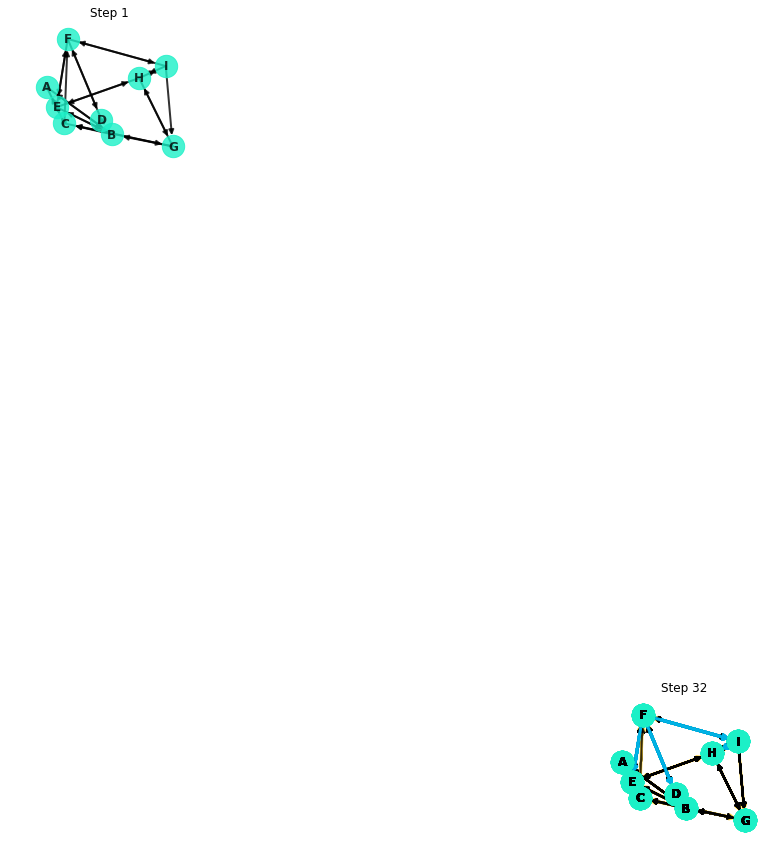

In [31]:
dijkstra(G, 'F', 'G')

## Summary 

Well done! In this lab, you deconstructed Dijkstra's algorithm and coded your own implementation! Finding the shortest path between nodes is a foundational concept in network theory and will help inform future concepts such as centrality and betweenness in order to further analyze the structures of graphs.